今天用昨天得到的效果进行聚类，进而推断出每个簇实际含义

In [1]:
import pandas as  pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

data=pd.read_csv('heart.csv')

# 医学特征中英文映射字典
medical_feature_map = {
    "age": "年龄",
    "sex": "性别",
    "cp": "胸痛类型",
    "trestbps": "静息血压",  # 单位：mm Hg（毫米汞柱）
    "chol": "血清胆固醇浓度",  # 单位：mg/dl（毫克/分升）
    "fbs": "空腹血糖",  # 单位：mg/dl，通常以120mg/dl为分界，大于120mg/dl为1
    "restecg": "静息心电图结果",
    "thalach": "最大心率",
    "exang": "运动诱发心绞痛",
    "oldpeak": "运动相对静息的ST段压低",  # 单位：mV（毫伏）
    "slope": "ST段峰值斜率",
    "ca": "荧光检查显示的主要血管数量",  # 0-3支
    "thal": "地中海贫血症状态",
    "target": "患病目标变量"  # 通常1=患病，0=正常
}

data = data.rename(columns=medical_feature_map)
data.head()

,年龄,性别,胸痛类型,静息血压,血清胆固醇浓度,空腹血糖,静息心电图结果,最大心率,运动诱发心绞痛,运动相对静息的ST段压低,ST段峰值斜率,荧光检查显示的主要血管数量,地中海贫血症状态,患病目标变量
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
data.columns

Index(['年龄', '性别', '胸痛类型', '静息血压', '血清胆固醇浓度', '空腹血糖', '静息心电图结果', '最大心率',
       '运动诱发心绞痛', '运动相对静息的ST段压低', 'ST段峰值斜率', '荧光检查显示的主要血管数量', '地中海贫血症状态',
       '患病目标变量'],
      dtype='object')

In [3]:
from sklearn.model_selection import train_test_split
X=data.drop(['患病目标变量'], axis=1)
y=data['患病目标变量']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(f'训练集形状：{X_train.shape}, 测试集形状：{X_test.shape}')

In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 标准化数据（聚类前通常需要标准化）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_scaled

k=2, 惯性: 3331.64, 轮廓系数: 0.166, CH 指数: 54.87, DB 指数: 2.209
k=3, 惯性: 3087.69, 轮廓系数: 0.112, CH 指数: 41.36, DB 指数: 2.544
k=4, 惯性: 2892.52, 轮廓系数: 0.118, CH 指数: 36.06, DB 指数: 2.175
k=5, 惯性: 2814.65, 轮廓系数: 0.094, CH 指数: 29.76, DB 指数: 2.386
k=6, 惯性: 2673.22, 轮廓系数: 0.095, CH 指数: 28.13, DB 指数: 2.377
k=7, 惯性: 2596.68, 轮廓系数: 0.088, CH 指数: 25.50, DB 指数: 2.290
k=8, 惯性: 2464.39, 轮廓系数: 0.115, CH 指数: 25.22, DB 指数: 2.136
k=9, 惯性: 2415.63, 轮廓系数: 0.105, CH 指数: 23.18, DB 指数: 2.133
k=10, 惯性: 2337.41, 轮廓系数: 0.111, CH 指数: 22.31, DB 指数: 2.056


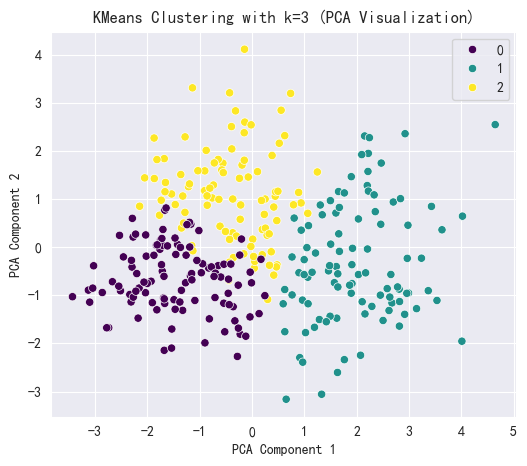

KMeans Cluster labels (k=3) added to X:
KMeans_Cluster
0                 108
1                  98
2                  97
Name: count, dtype: int64


In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 评估不同 k 值下的指标
k_range = range(2, 11)  # 测试 k 从 2 到 10
inertia_values = []
silhouette_scores = []
ch_scores = []
db_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    inertia_values.append(kmeans.inertia_)  # 惯性（肘部法则）
    silhouette = silhouette_score(X_scaled, kmeans_labels)  # 轮廓系数
    silhouette_scores.append(silhouette)
    ch = calinski_harabasz_score(X_scaled, kmeans_labels)  # CH 指数
    ch_scores.append(ch)
    db = davies_bouldin_score(X_scaled, kmeans_labels)  # DB 指数
    db_scores.append(db)
    print(f"k={k}, 惯性: {kmeans.inertia_:.2f}, 轮廓系数: {silhouette:.3f}, CH 指数: {ch:.2f}, DB 指数: {db:.3f}")

# # 绘制评估指标图
# plt.figure(figsize=(15, 10))

# # 肘部法则图（Inertia）
# plt.subplot(2, 2, 1)
# plt.plot(k_range, inertia_values, marker='o')
# plt.title('肘部法则确定最优聚类数 k（惯性，越小越好）')
# plt.xlabel('聚类数 (k)')
# plt.ylabel('惯性')
# plt.grid(True)

# # 轮廓系数图
# plt.subplot(2, 2, 2)
# plt.plot(k_range, silhouette_scores, marker='o', color='orange')
# plt.title('轮廓系数确定最优聚类数 k（越大越好）')
# plt.xlabel('聚类数 (k)')
# plt.ylabel('轮廓系数')
# plt.grid(True)

# # CH 指数图
# plt.subplot(2, 2, 3)
# plt.plot(k_range, ch_scores, marker='o', color='green')
# plt.title('Calinski-Harabasz 指数确定最优聚类数 k（越大越好）')
# plt.xlabel('聚类数 (k)')
# plt.ylabel('CH 指数')
# plt.grid(True)

# # DB 指数图
# plt.subplot(2, 2, 4)
# plt.plot(k_range, db_scores, marker='o', color='red')
# plt.title('Davies-Bouldin 指数确定最优聚类数 k（越小越好）')
# plt.xlabel('聚类数 (k)')
# plt.ylabel('DB 指数')
# plt.grid(True)

# plt.tight_layout()
# plt.show()

# 提示用户选择 k 值
selected_k = 3 # 这里选择3后面好分析，也可以根据图选择最佳的k值

# 使用选择的 k 值进行 KMeans 聚类
kmeans = KMeans(n_clusters=selected_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
X['KMeans_Cluster'] = kmeans_labels

# 使用 PCA 降维到 2D 进行可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans 聚类结果可视化
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title(f'KMeans Clustering with k={selected_k} (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# 打印 KMeans 聚类标签的前几行
print(f"KMeans Cluster labels (k={selected_k}) added to X:")
print(X[['KMeans_Cluster']].value_counts())

现在需要给这个簇赋予实际的含义，一般当你赋予实际含义的时候，你需要根据某几个特征来赋予，但是源数据特征很多，如何选择特征呢？有2种思路：

1. 你最开始聚类的时候，就选择了你想最后用来确定簇含义的特征，那么你需要选择一些特征来进行聚类，那么你最后确定簇含义的特征就是这几个特征，而非全部。如你想聚类消费者购买习惯，那么他过去的消费记录、购买记录、购买金额等等，这些特征都与消费者购买习惯有关，你可以使用这些特征来确定簇含义，一些其他的特征，如消费者年龄，工作行业则不考虑。----适用于你本身就有构造某些明确含义的特征的情况。

2. 最开始用全部特征来聚类，把其余特征作为 x，聚类得到的簇类别作为标签构建监督模型，进而根据重要性筛选特征，来确定要根据哪些特征赋予含义。---使用于你想构造什么，目前还不清楚。

In [6]:
X.columns

Index(['年龄', '性别', '胸痛类型', '静息血压', '血清胆固醇浓度', '空腹血糖', '静息心电图结果', '最大心率',
       '运动诱发心绞痛', '运动相对静息的ST段压低', 'ST段峰值斜率', '荧光检查显示的主要血管数量', '地中海贫血症状态',
       'KMeans_Cluster'],
      dtype='object')

In [7]:
x1= X.drop('KMeans_Cluster',axis=1) # 删除聚类标签列
y1 = X['KMeans_Cluster']
# 构建随机森林，用shap重要性来筛选重要性
import shap
import numpy as np
from sklearn.ensemble import RandomForestClassifier  # 随机森林分类器
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 随机森林模型
model.fit(x1, y1);  # 训练模型,此时无需在意准确率 直接全部数据用来训练了

In [8]:
shap.initjs()
# 初始化 SHAP 解释器
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x1) # 这个计算耗时
shap_values=np.array(shap_values)
shap_values.shape # 第一维是类别数，第二维是样本数，第三维是特征数

(3, 303, 13)

--- 1. SHAP 特征重要性条形图 ---


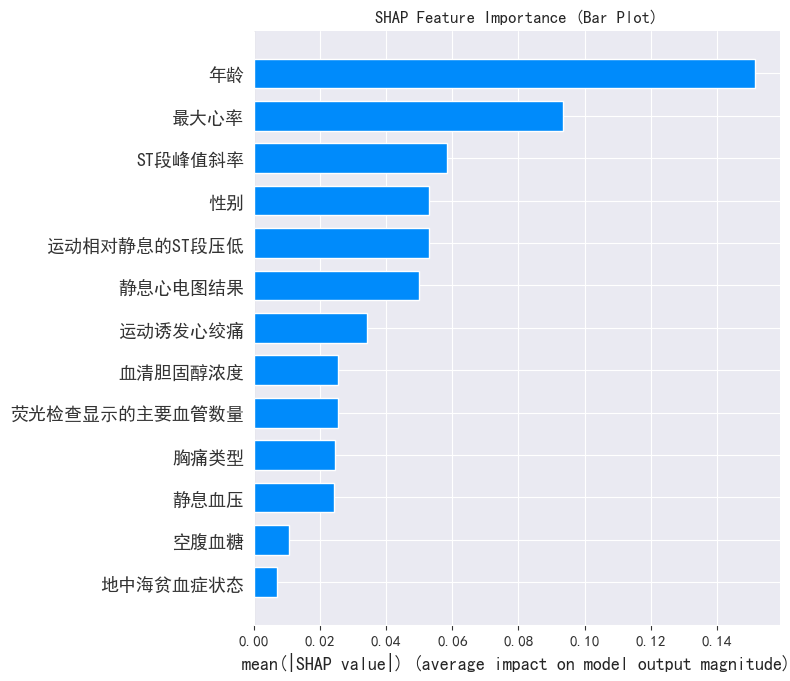

In [9]:
# --- 1. SHAP 特征重要性条形图 (Summary Plot - Bar) ---
print("--- 1. SHAP 特征重要性条形图 ---")
shap.summary_plot(shap_values[0], x1, plot_type="bar",show=False)  #  这里的show=False表示不直接显示图形,这样可以继续用plt来修改元素，不然就直接输出了
plt.title("SHAP Feature Importance (Bar Plot)")
plt.show()

In [10]:
# 选择用于分析每个簇的特征（这里简单选取前 4 个特征）
selected_features = x1.columns[:4].tolist()
selected_features

['年龄', '性别', '胸痛类型', '静息血压']

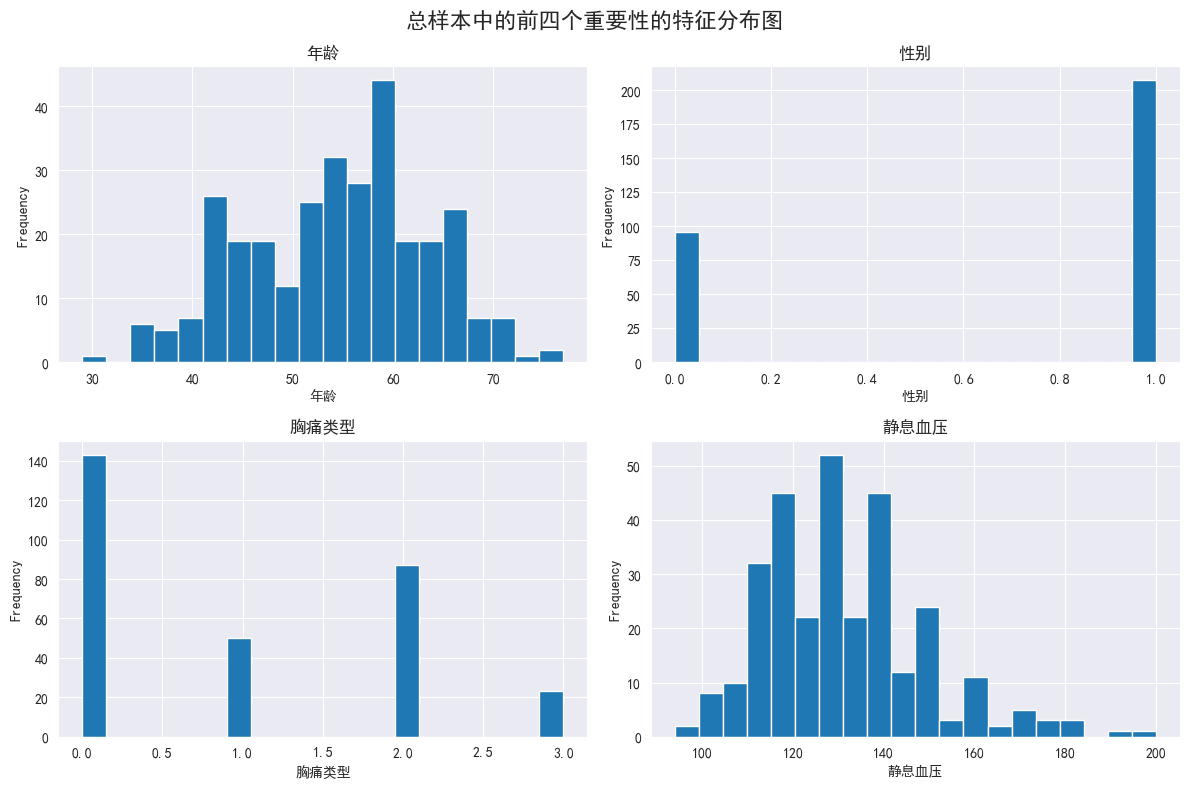

In [11]:
# X["Purpose_debt consolidation"].value_counts() # 统计每个唯一值的出现次数
import matplotlib.pyplot as plt

# 总样本中的前四个重要性的特征分布图
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    axes[i].hist(X[feature], bins=20)
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.suptitle("总样本中的前四个重要性的特征分布图", fontsize=16)

plt.tight_layout()
plt.show()

In [12]:
# 绘制出每个簇对应的这四个特征的分布图
X[['KMeans_Cluster']].value_counts()

KMeans_Cluster
0                 108
1                  98
2                  97
Name: count, dtype: int64

In [13]:
# 分别筛选出每个簇的数据
X_cluster0 = X[X['KMeans_Cluster'] == 0]
X_cluster1 = X[X['KMeans_Cluster'] == 1]
X_cluster2 = X[X['KMeans_Cluster'] == 2]

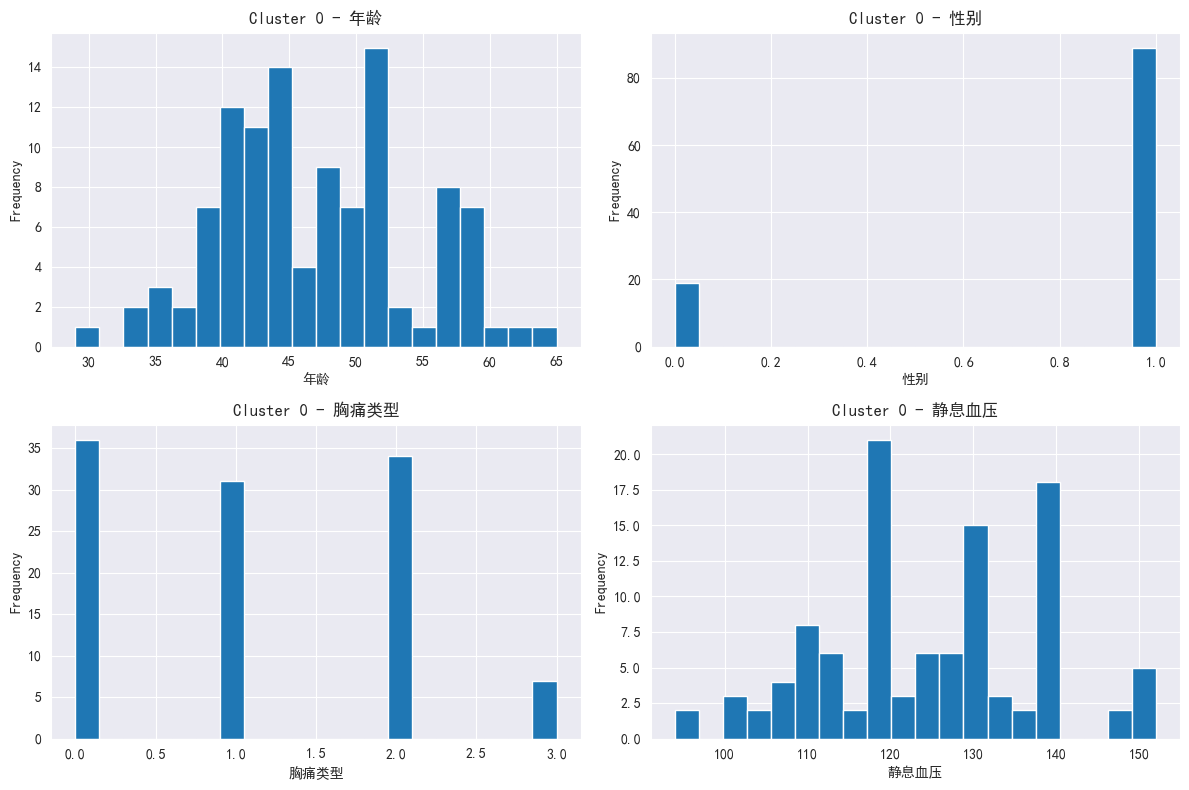

In [14]:
# 先绘制簇0的分布图

import matplotlib.pyplot as plt

# 总样本中的前四个重要性的特征分布图
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    axes[i].hist(X_cluster0[feature], bins=20)
    axes[i].set_title(f'Cluster 0 - {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

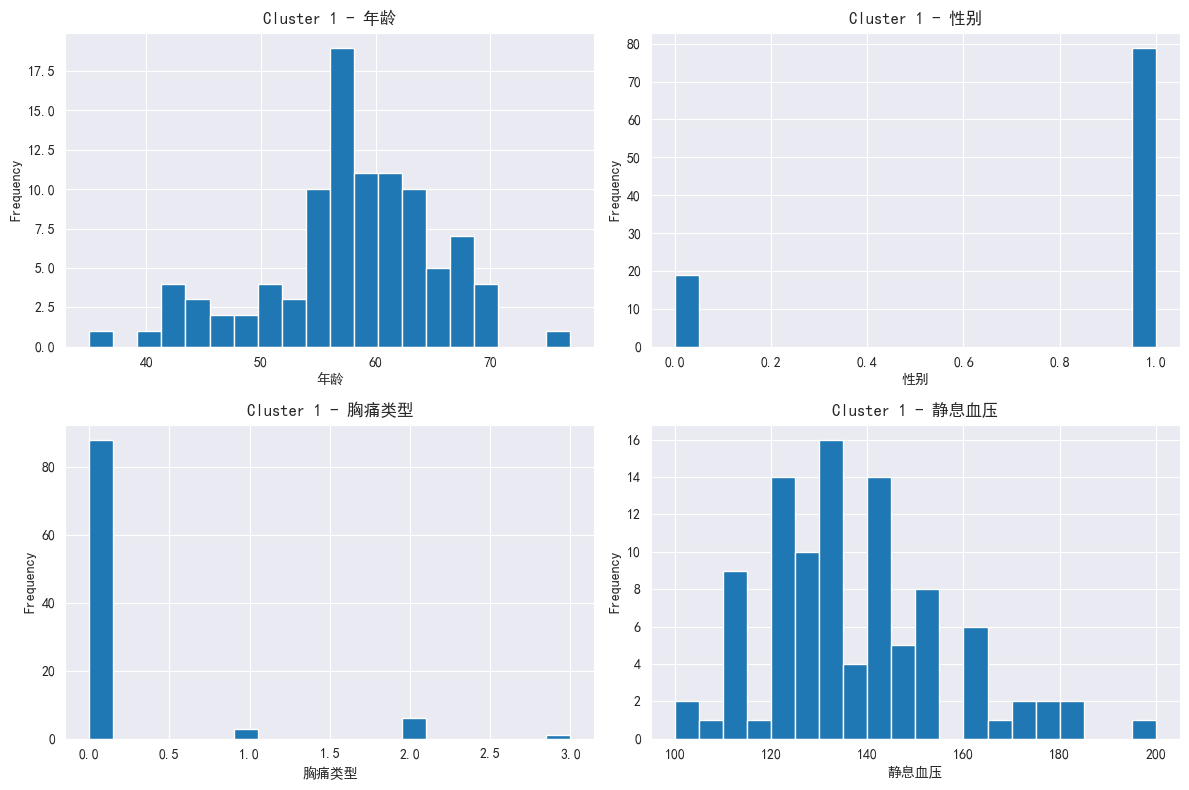

In [15]:
# 再绘制簇1的分布图

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    axes[i].hist(X_cluster1[feature], bins=20)
    axes[i].set_title(f'Cluster 1 - {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

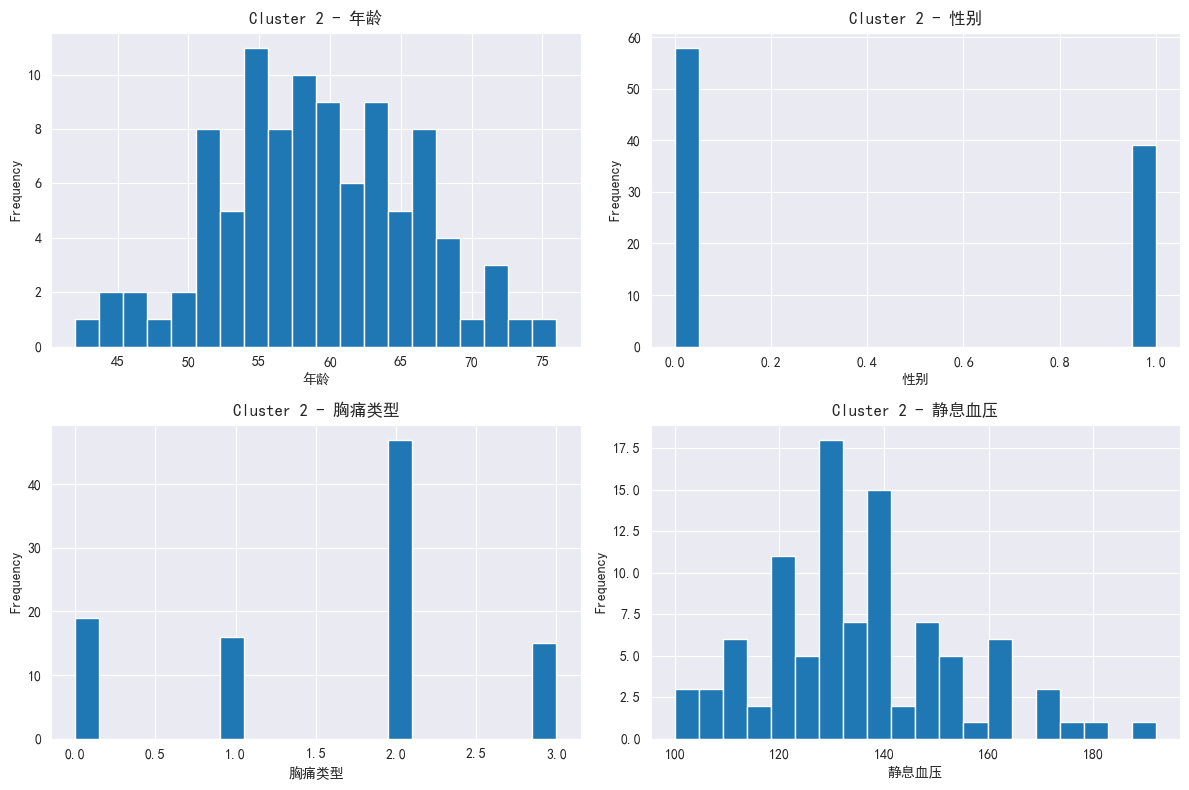

In [16]:
# 最后绘制簇2的分布图

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    axes[i].hist(X_cluster2[feature], bins=20)
    axes[i].set_title(f'Cluster 2 - {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

把这三个簇的图发给ai，让ai给定义

### 三个簇的总结与定义
📌 第一个簇（Cluster 0）—— 中青年男性为主的典型胸痛风险型

**特征总结：**

- 年龄： 该簇以40–55岁的中青年群体为主，年龄分布集中且较偏年轻。

- 性别： 明显以男性占绝大多数（图中男性：女性 ≈ 9:1）。

- 胸痛类型： 多数样本集中在胸痛类型 0、1、2，呈现多种胸痛表现（典型型、非典型型、无症状均有）。

- 静息血压： 多数集中在115–135 mmHg 区间，属于正常偏高或轻度升高水平。

**定义依据：**

Cluster 0 中个体多为中青年男性，胸痛类型复杂多样，但整体血压情况相对稳定，因此呈现出“存在多个早期心血管风险信号，但总体较健康”的特征。

📌 第二个簇（Cluster 1）—— 老年高血压高风险男性群体

**特征总结：**

- 年龄： 主要集中在 55–70岁，年龄比 Cluster 0 明显偏高。

- 性别： 同样以男性为主，男女差异巨大。

- 胸痛类型： 压倒性集中在 胸痛类型 0（典型心绞痛），其他类型极少。

- 静息血压： 明显偏高，常见范围为 120–160 mmHg，部分接近180或更高。

**定义依据：**

该簇样本普遍年龄偏大，典型心绞痛占多数，同时静息血压显著偏高，是心血管疾病的典型高风险组合。

📌 第三个簇（Cluster 2）—— 中老年混合胸痛且血压离散型

**特征总结：**

- 年龄： 多数在 50–70岁 区间，是年龄跨度最大的一个簇。

- 性别： 男女比例比前两簇更接近，但男性仍略多。

- 胸痛类型： 胸痛类型 分布均衡（0 / 1 / 2 / 3 都有），多样性显著高于其他簇。

- 静息血压： 分布范围最广，从100–180 mmHg均有，呈现明显离散特征。

**定义依据：**

Cluster 2 个体在年龄、胸痛表现和血压方面都非常多样，风险指标呈现明显的异质性。不同于 Cluster 1 的集中高风险，该簇呈现“多来源、多特征”的特点。


In [17]:
# --- 使用随机森林评估聚类特征工程效果 ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

X_with_cluster = X.copy()
X_without_cluster = X_with_cluster.drop(columns=['KMeans_Cluster'])

X_train_base, X_test_base, y_train, y_test = train_test_split(
    X_without_cluster, y, test_size=0.2, random_state=42, stratify=y
)
X_train_cluster = X_with_cluster.loc[X_train_base.index]
X_test_cluster = X_with_cluster.loc[X_test_base.index]

rf_params = dict(n_estimators=500, random_state=42, n_jobs=1)


def evaluate_rf(X_train, X_test, y_train, y_test, desc):
    """训练随机森林并返回各项指标"""
    model = RandomForestClassifier(**rf_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    metrics = {
        '特征方案': desc,
        'accuracy': accuracy_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob)
    }
    report = classification_report(y_test, y_pred, digits=4)
    return metrics, report

results = []
reports = {}

metrics_base, report_base = evaluate_rf(X_train_base, X_test_base, y_train, y_test, '原始特征')
results.append(metrics_base)
reports['原始特征'] = report_base

metrics_cluster, report_cluster = evaluate_rf(X_train_cluster, X_test_cluster, y_train, y_test, '原始特征+聚类标签')
results.append(metrics_cluster)
reports['原始特征+聚类标签'] = report_cluster

comparison_df = pd.DataFrame(results).set_index('特征方案')
print('随机森林在不同特征方案下的表现:')
print(comparison_df)

improvement = (comparison_df.loc['原始特征+聚类标签'] - comparison_df.loc['原始特征']) * 100
print('聚类特征带来的提升(百分点):')
print(improvement.round(2))

for name, text in reports.items():
    print(f"{name} 分类报告:{text}")


随机森林在不同特征方案下的表现:
           accuracy  f1_score   roc_auc
特征方案                                   
原始特征       0.819672  0.853333  0.895563
原始特征+聚类标签  0.836066  0.864865  0.909091
聚类特征带来的提升(百分点):
accuracy    1.64
f1_score    1.15
roc_auc     1.35
dtype: float64
原始特征 分类报告:              precision    recall  f1-score   support

           0     0.9474    0.6429    0.7660        28
           1     0.7619    0.9697    0.8533        33

    accuracy                         0.8197        61
   macro avg     0.8546    0.8063    0.8096        61
weighted avg     0.8470    0.8197    0.8132        61

原始特征+聚类标签 分类报告:              precision    recall  f1-score   support

           0     0.9500    0.6786    0.7917        28
           1     0.7805    0.9697    0.8649        33

    accuracy                         0.8361        61
   macro avg     0.8652    0.8241    0.8283        61
weighted avg     0.8583    0.8361    0.8313        61



可以看到，模型有所提升。